In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
loan = pd.read_csv('/content/Loan_prediction_dataset.csv')
print(loan.shape)
print(loan.columns)
print(loan.head())


(614, 13)
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120

In [ ]:
print(loan.isnull().sum())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
# Fill numeric missing with median
loan['LoanAmount'].fillna(loan['LoanAmount'].median(), inplace=True)

# Fill categorical with mode (most frequent value)
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']:
    loan[col].fillna(loan[col].mode()[0], inplace=True)


/tmp/ipython-input-25-1890671826.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan['LoanAmount'].fillna(loan['LoanAmount'].median(), inplace=True)
/tmp/ipython-input-25-1890671826.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

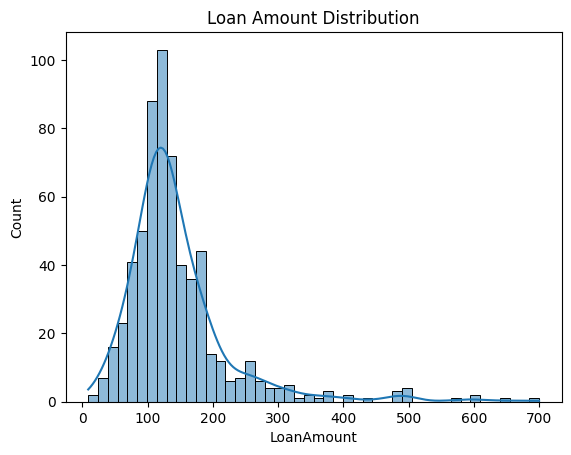

In [ ]:
sns.histplot(loan['LoanAmount'], kde=True)
plt.title('Loan Amount Distribution')
plt.show()


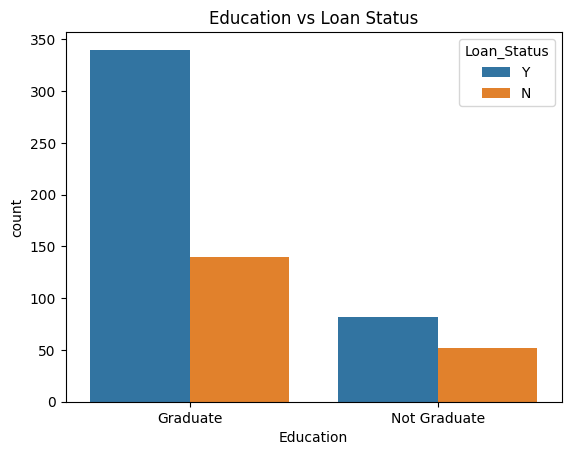

In [ ]:
sns.countplot(x='Education', hue='Loan_Status', data=loan)
plt.title('Education vs Loan Status')
plt.show()


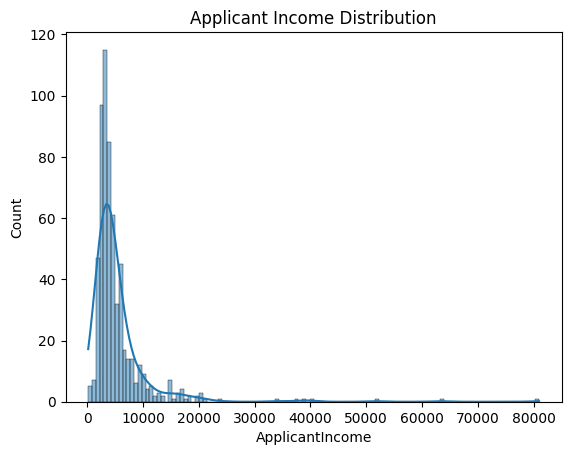

In [ ]:
sns.histplot(loan['ApplicantIncome'], kde=True)
plt.title('Applicant Income Distribution')
plt.show()


In [ ]:
# Encode all object columns
for col in loan.select_dtypes(include='object').columns:
    le = LabelEncoder()
    loan[col] = le.fit_transform(loan[col])


In [ ]:
X = loan.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = loan['Loan_Status']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=5000)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Logistic Regression Accuracy: 0.7886178861788617


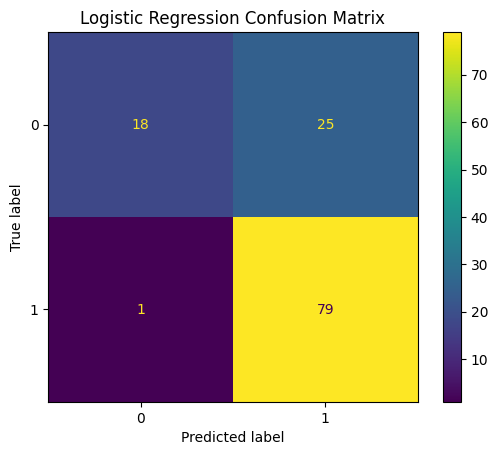

In [ ]:
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", acc_lr)

cm_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm_lr).plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()


Decision Tree Accuracy: 0.6910569105691057


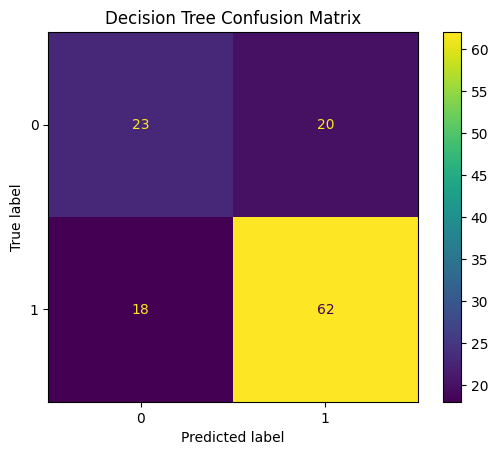

In [ ]:
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", acc_dt)

cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm_dt).plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()


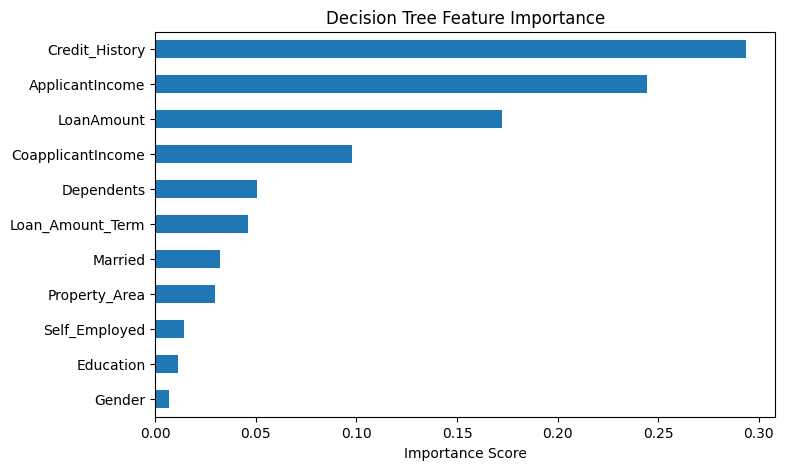

In [ ]:
importances = pd.Series(dt.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,5))
plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance Score')
plt.show()
